In [1]:
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb

In [4]:
# Import csv 
fireball_df = pd.read_csv("Resources/cleaned_fireball_data.csv")
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-02-02 20:49:22,26.2S,143.1W,33.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100
1,2023-01-22 17:11:43,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073
2,2023-01-17 06:56:59,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.900000e+10,0.100
3,2023-01-11 23:59:50,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150
4,2023-01-09 01:17:14,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280
...,...,...,...,...,...,...,...,...,...,...
940,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
941,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
942,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
943,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [5]:
# Observe data types
fireball_df.dtypes

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                         object
Longitude (deg.)                        object
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [7]:
# Convert Peak Brightness Date/Time column to datetime
fireball_df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(fireball_df['Peak Brightness Date/Time (UT)'])
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-02-02 20:49:22,26.2S,143.1W,33.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100
1,2023-01-22 17:11:43,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073
2,2023-01-17 06:56:59,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.900000e+10,0.100
3,2023-01-11 23:59:50,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150
4,2023-01-09 01:17:14,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280
...,...,...,...,...,...,...,...,...,...,...
940,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
941,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
942,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
943,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [8]:
# Convert Peak Brightness Date/Time column to show only the year
fireball_df['Peak Brightness Date/Time (UT)'] = fireball_df['Peak Brightness Date/Time (UT)'].dt.year
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023,26.2S,143.1W,33.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100
1,2023,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073
2,2023,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.900000e+10,0.100
3,2023,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150
4,2023,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280
...,...,...,...,...,...,...,...,...,...,...
940,1993,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
941,1993,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
942,1991,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
943,1990,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


<AxesSubplot:xlabel='Peak Brightness Date/Time (UT)', ylabel='Calculated Total Impact Energy (kt)'>

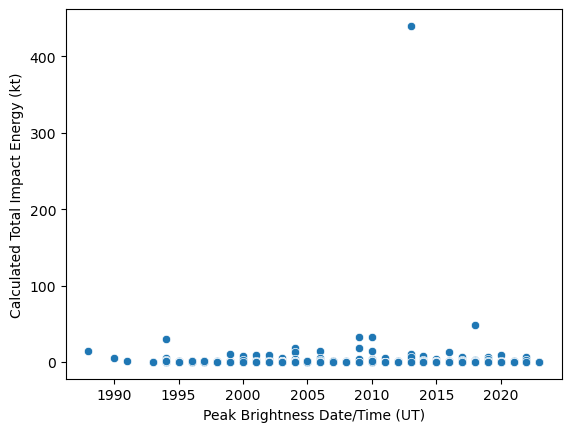

In [20]:
sb.scatterplot(x='Peak Brightness Date/Time (UT)', y="Calculated Total Impact Energy (kt)", data=fireball_df)

In [9]:
# save to CSV
fireball_df.to_csv("Resources/fireball_data_years.csv")

In [15]:
# Use groupby to get a count for sightings by year
fireball_grouped = fireball_df.sort_values('Peak Brightness Date/Time (UT)')
fireball_grouped = fireball_grouped.groupby('Peak Brightness Date/Time (UT)', as_index=False).count()
fireball_grouped

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,1988,1,1,0,0,0,0,0,1,1
1,1990,1,1,0,0,0,0,0,1,1
2,1991,1,1,0,0,0,0,0,1,1
3,1993,2,2,0,0,0,0,0,2,2
4,1994,7,7,0,0,0,0,0,13,13
5,1995,9,9,0,0,0,0,0,21,21
6,1996,12,12,0,0,0,0,0,33,33
7,1997,14,14,1,0,0,0,0,21,21
8,1998,5,5,1,1,1,1,1,13,13
9,1999,22,22,5,0,0,0,0,30,30


In [ ]:
#fireball_grouped = fireball_grouped.rename(columns={"Latitude (deg.)": "count"})

In [18]:
# Change to display just year and count
# fireball_grouped = fireball_grouped.rename(columns={"Latitude (deg.)": "count"})
# fireball_grouped = fireball_grouped[['Peak Brightness Date/Time (UT)', 'count']]
# fireball_grouped

<AxesSubplot:xlabel='Peak Brightness Date/Time (UT)', ylabel='Calculated Total Impact Energy (kt)'>

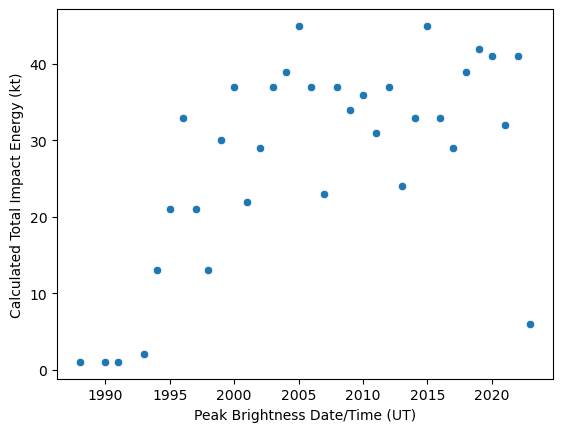

In [19]:
#Vis

sb.scatterplot(x='Peak Brightness Date/Time (UT)', y="Calculated Total Impact Energy (kt)", data=fireball_grouped)

In [14]:
#Scatterplot visualization
sb.scatterplot(x='data available', y="count", data=fireball_grouped)

ValueError: Could not interpret value `data available` for parameter `x`

In [9]:
# save to CSV
fireball_df.to_csv("Resources/fireball_year_count.csv",index=False)